### Part 1: Implementing Logistic Regression classifier from scratch

You are not allowed to use scikit-learn or any other machine learning toolkit for this part. You have to implement your own Logistic Regression classifier from scratch. You may use Pandas, NumPy, Matplotlib, and other standard Python libraries.

#### Problem:
The purpose of this assignment is to get you familiar with the Logistic Regression classification. You are given the ‘MNIST’ dataset that contains around 60000 hand drawn digits. Your task is to implement the Logistic Regression classifier and use it for predicting the digits based on their drawing.


In [ ]:
## Here are the libraries you will need for this part/
import pandas as pd
import numpy as np
import scipy.spatial as sc
import matplotlib.pyplot as plt
import re
import random
%matplotlib inline

from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

#### Task 1.1: Dataset
The MNIST digits dataset is a widely used benchmark dataset in the field of machine learning and computer vision. MNIST stands for Modified National Institute of Standards and Technology, which is the organization that collected and curated the dataset. The MNIST dataset consists of a collection of 60,000 handwritten digit images for training and an additional 10,000 images for testing. These images are grayscale and have a fixed size of 28x28 pixels. Each image represents a single handwritten digit ranging from 0 to 9.  Each image in the dataset is accompanied by its corresponding label, indicating the digit it represents. The labels are represented as integers from 0 to 9, matching the handwritten digit in the image. This labeling allows for supervised learning tasks, where algorithms can learn to classify and recognize handwritten digits based on the provided training examples.

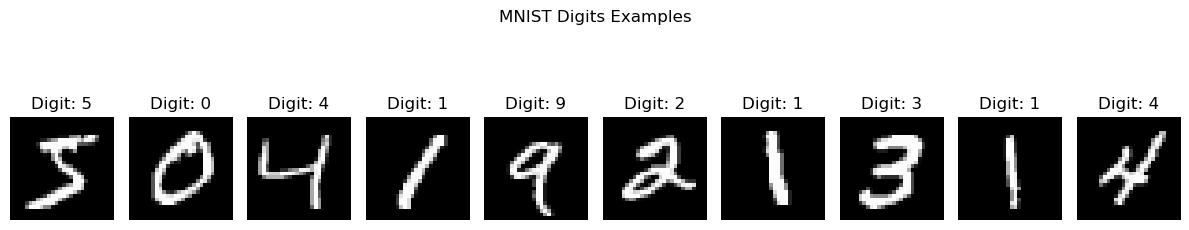

In [ ]:
mnist_data = pd.read_csv("mnist_dataset.csv").astype(np.uint8)
# generating digit images from csv file
images = mnist_data.iloc[:, 1:].values
labels = mnist_data.iloc[:, 0].values

fig, axes = plt.subplots(1, 10, figsize=(12, 3))
plt.suptitle("MNIST Digits Examples", fontsize=12)
for i in range(10):
    axes[i].imshow(images[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Digit: {labels[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

#### Task 1.2: Data Preprocessing

In the preprocessing step, you’re required to load the data, and scale the values using the StandardScalar function present in scikit-learn

In [ ]:
data = pd.read_csv("mnist_dataset.csv")

X = data.drop(columns='label')
y = data['label']
# scaling the data
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
data = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)

data.describe()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28,label
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.0,60000.0,60000.0,60000.0,60000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-4.855375e-18,5.713948e-18,-1.835569e-18,-1.421085e-18,-2.486900e-18,0.0,0.0,0.0,0.0,4.453933
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,0.0,0.0,0.0,0.0,2.889270
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.246288e-02,-1.606909e-02,-1.143220e-02,-9.007295e-03,-5.770394e-03,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.246288e-02,-1.606909e-02,-1.143220e-02,-9.007295e-03,-5.770394e-03,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.246288e-02,-1.606909e-02,-1.143220e-02,-9.007295e-03,-5.770394e-03,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.246288e-02,-1.606909e-02,-1.143220e-02,-9.007295e-03,-5.770394e-03,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.418128e+01,8.907405e+01,1.499806e+02,1.513374e+02,1.788764e+02,0.0,0.0,0.0,0.0,9.000000


In [ ]:
data.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.022463,-0.016069,-0.011432,-0.009007,-0.00577,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.022463,-0.016069,-0.011432,-0.009007,-0.00577,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.022463,-0.016069,-0.011432,-0.009007,-0.00577,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.022463,-0.016069,-0.011432,-0.009007,-0.00577,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.022463,-0.016069,-0.011432,-0.009007,-0.00577,0.0,0.0,0.0,0.0,9


In [ ]:
# checking the shape of the data
data.shape

(60000, 785)

In [ ]:
# checking the descriptive summary of the data
data.describe()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28,label
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.0,60000.0,60000.0,60000.0,60000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-4.855375e-18,5.713948e-18,-1.835569e-18,-1.421085e-18,-2.486900e-18,0.0,0.0,0.0,0.0,4.453933
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,0.0,0.0,0.0,0.0,2.889270
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.246288e-02,-1.606909e-02,-1.143220e-02,-9.007295e-03,-5.770394e-03,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.246288e-02,-1.606909e-02,-1.143220e-02,-9.007295e-03,-5.770394e-03,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.246288e-02,-1.606909e-02,-1.143220e-02,-9.007295e-03,-5.770394e-03,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.246288e-02,-1.606909e-02,-1.143220e-02,-9.007295e-03,-5.770394e-03,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.418128e+01,8.907405e+01,1.499806e+02,1.513374e+02,1.788764e+02,0.0,0.0,0.0,0.0,9.000000


#### Task 1.3: Splitting the dataset

In this part, divide the given dataset into training and testing sets using python.
Print out the sizes of the training dataset and test dataset, training data should contain 50000 images and test data should contain 10000 images. If your sizes are correct, you get full points.

In [ ]:
#splitting the data into train and test set
df = data.sample(frac=1, random_state=42).reset_index(drop=True)

train_data = df.iloc[:50000]
test_data = df.iloc[50000:]


X_train = train_data.drop(columns=['label'])
y_train = train_data['label']
X_test = test_data.drop(columns=['label'])
y_test = test_data['label']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 784), (50000,), (10000, 784), (10000,))

#### Task 1.4: Create Logistic Regression classifier

Implement Multinomial Logistic Regression from scratch keeping in view all the discussions
from the lectures to classify the images into the 10 classes specified. Specifically, you’ll need to implement the
following: <br>
● Softmax function <br>
● Cross-entropy loss function (for multinomial logistic regression) <br>
● Batch Gradient Descent <br>
● Prediction function that predicts the label of test recordings using learned
multinomial logistic regression

In [ ]:
# logisitic regression class from scratch
class OvALogisticReg:
    def __init__(self, num_classes, num_features, learning_rate=0.01, epochs=100):
        self.num_classes = num_classes
        self.num_features = num_features
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = np.zeros((num_classes, num_features))  # one weight vector per class
        self.bias = np.zeros(num_classes)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def softmax(self, z):
        z = z - np.max(z, axis=1, keepdims=True)
        exp_z = np.exp(z)
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def cross_entropy_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
        loss = -np.sum(y_true * np.log(y_pred)) / m
        return loss

    def fit(self, X, y):
        X = np.asarray(X)
        y = np.asarray(y).flatten()
        m = X.shape[0]

        for c in range(self.num_classes):
            y_binary = (y == c).astype(np.float32)
            w = self.weights[c]
            b = self.bias[c]

            for epoch in range(self.epochs):
                z = np.dot(X, w) + b
                y_pred = self.sigmoid(z)

                error = y_pred - y_binary
                dw = np.dot(X.T, error) / m
                db = np.sum(error) / m

                w -= self.learning_rate * dw
                b -= self.learning_rate * db

            self.weights[c] = w
            self.bias[c] = b

    def predict(self, X):
        X = np.asarray(X)
        logits = np.dot(X, self.weights.T) + self.bias
        probs = self.softmax(logits)
        return np.argmax(probs, axis=1)

#### Task 1.5: Implement evaluation functions

Implement evaluation functions that calculates the:
- classification accuracy,
- F1 score,
- and the confusion matrix
of your classifier on the test set.


In [ ]:
# accuracy function
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)
# confusion matrix
def confusion_matrix(y_true, y_pred, num_classes):
    cm = np.zeros((num_classes, num_classes), dtype=int)
    for t, p in zip(y_true, y_pred):
        cm[t, p] += 1
    return cm
# f1 score
def macro_f1(y_true, y_pred, num_classes):
    cm = confusion_matrix(y_true, y_pred, num_classes)
    f1s = []
    for i in range(num_classes):
        tp = cm[i, i]
        fp = cm[:, i].sum() - tp
        fn = cm[i, :].sum() - tp
        precision = tp / (tp + fp) if (tp + fp) else 0
        recall = tp / (tp + fn) if (tp + fn) else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) else 0
        f1s.append(f1)
    return np.mean(f1s)

#### Task 1.6: Cross Validation

Use 5- fold cross-validation on your training data. (In cross-validation, you divide the training data set into 5 parts. 4 parts will be used for training and 1 part will be used for validation. Then you will take a different part of your data as a validation data set and train your algorithm on the rest of the data set.) Run your Logistic Regression function for this data for 5 learning rate values ranging from 0.001 and 0.01.

Run your evaluation function for each value of the learning rate, Report classification accuracy, F1 score, and confusion matrix.

Present the results as a graph with learning rate values on the x-axis and classification accuracy on the y-axis. Make another graph but with the F1 score on the y-axis this time. The graphs should be properly labelled.

In [ ]:
# K-Fold Split function
def k_fold_split(data, labels, k_folds):
    fold_size = len(data) // k_folds
    folds = []
    for i in range(k_folds):
        start = i * fold_size
        end = (i + 1) * fold_size if i < k_folds - 1 else len(data)
        val_data = data[start:end]
        val_labels = labels[start:end]
        train_data = np.concatenate((data[:start], data[end:]), axis=0)
        train_labels = np.concatenate((labels[:start], labels[end:]), axis=0)
        folds.append((train_data, train_labels, val_data, val_labels))
    return folds

num_classes = len(np.unique(y_train))
num_features = X_train.shape[1]
learning_rates = np.linspace(0.001, 0.01, 5)

X_train = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
folds = k_fold_split(X_train, y_train, k_folds=5)

# cross validation
results = []
for lr in learning_rates:
    acc_scores = []
    f1_scores = []
    avg_accuracies = []
    avg_f1_scores = []
    cm_total = np.zeros((num_classes, num_classes), dtype=int)
    print(f"\n===== Learning Rate: {lr:.4f} =====")

    for fold_idx, (X_tr, y_tr, X_val, y_val) in enumerate(folds):

        model = OvALogisticReg(num_classes, num_features, learning_rate=lr, epochs=20)
        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_val)

        acc = accuracy(y_val, y_pred)
        f1= macro_f1(y_val, y_pred, num_classes)
        cm = confusion_matrix(y_val, y_pred, num_classes)

        acc_scores.append(acc)
        f1_scores.append(f1)
        avg_accuracies.append(np.mean(acc_scores))
        avg_f1_scores.append(np.mean(f1_scores))
        cm_total += cm
        results.append({
        'learning_rate': lr,
        'accuracy': avg_accuracies,
        'f1_score': avg_f1_scores
        })

        print(f" Fold {fold_idx + 1}: Accuracy = {acc:.2f}, Macro F1 = {f1:.2f}")

    print(f"\n>> Average Accuracy: {np.mean(acc_scores):.2f}")
    print(f">> Average Macro F1 Score: {np.mean(f1_scores):.2f}")
    print(">> Total Confusion Matrix:")
    print(cm_total)


===== Learning Rate: 0.0010 =====
 Fold 1: Accuracy = 0.74, Macro F1 = 0.73
 Fold 2: Accuracy = 0.75, Macro F1 = 0.74
 Fold 3: Accuracy = 0.74, Macro F1 = 0.73
 Fold 4: Accuracy = 0.75, Macro F1 = 0.74
 Fold 5: Accuracy = 0.74, Macro F1 = 0.73

>> Average Accuracy: 0.74
>> Average Macro F1 Score: 0.73
>> Total Confusion Matrix:
[[4669   23   13   37    1    6  152    5   29   17]
 [   0 5522   18   10    0    0   13    6   12    2]
 [ 351  396 3634  126   50    1  193  100   77   14]
 [ 196  434  155 4026    4    5   54  152   77   69]
 [ 191  413   35    3 3553   15  111  106   16  445]
 [ 513  752   63  924   59 1750  141   97   63  162]
 [ 357  306   55    2    7   37 4126    2    5    2]
 [  98  410   26   19   29    1    1 4557   11   75]
 [ 299 1084  111  524   39  101   38  103 2378  169]
 [ 199  415   22   66  211    2    2 1069   25 2956]]

===== Learning Rate: 0.0033 =====
 Fold 1: Accuracy = 0.75, Macro F1 = 0.75
 Fold 2: Accuracy = 0.76, Macro F1 = 0.75
 Fold 3: Accuracy =

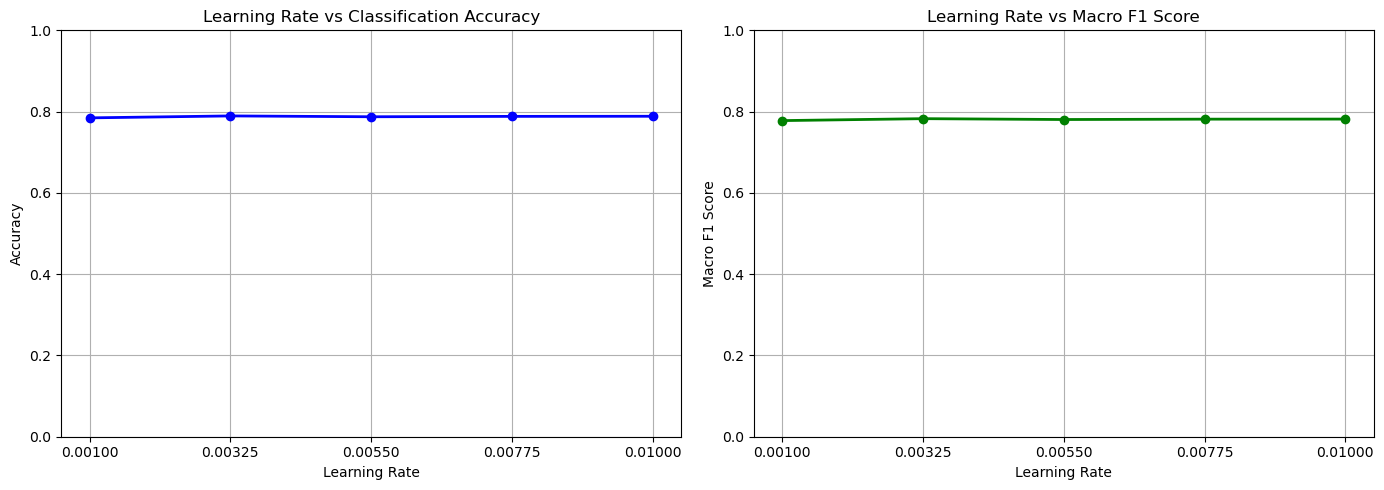

In [ ]:
# plotting the learning rate with accuracy and F1 Score
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns

axes[0].plot(learning_rates, avg_accuracies, marker='o', color='blue', linewidth=2)
axes[0].set_title('Learning Rate vs Classification Accuracy')
axes[0].set_xlabel('Learning Rate')
axes[0].set_ylabel('Accuracy')
axes[0].grid(True)
axes[0].set_xticks(learning_rates)
axes[0].set_ylim(0, 1)

axes[1].plot(learning_rates, avg_f1_scores, marker='o', color='green', linewidth=2)
axes[1].set_title('Learning Rate vs Macro F1 Score')
axes[1].set_xlabel('Learning Rate')
axes[1].set_ylabel('Macro F1 Score')
axes[1].grid(True)
axes[1].set_xticks(learning_rates)
axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

#### Task 1.7: Classification

Finally, use the best value of the learning rate and run it on the test data set. Find the F1 score, classification accuracy, and confusion matrix and print them.

You accuracy should be above 80 and f1 score should be above 70 to get full points.

In [ ]:
# finding the best values
best_by_f1 = sorted(results, key=lambda x: x['f1_score'], reverse=True)[0]
best_lr = best_by_f1['learning_rate']

# checking the model on test data
X_test = X_test.to_numpy()
model = OvALogisticReg(num_classes, num_features, learning_rate=best_lr, epochs=300)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation metrics
acc_test = accuracy(y_test, y_pred)
f1_test = macro_f1(y_test, y_pred, num_classes)
cm_test = confusion_matrix(y_test, y_pred, num_classes)
print(f"F1 Score: {f1_test:.2f}")
print(f"Accuracy: {acc_test:.2f}")
print(f"Confusion Matrix:")
print(cm_test)

F1 Score: 0.84
Accuracy: 0.85
Confusion Matrix:
[[ 923    0    8    3    3    6   18    1    8    1]
 [   1 1135    4    1    1    3    3    4    7    0]
 [  21   55  805   16   24    0   47   19   24    5]
 [  10   40   41  779    5   13   11   30   19   11]
 [   3   28    8    0  837   12   10    6    9   41]
 [  36   19    7   97   21  634   33    8   26   16]
 [  33   16   15    0    8   16  928    0    3    0]
 [   9   39    7    4   15    0    1  931    1   31]
 [  17  104   18   40   12   33   13    8  742   18]
 [  16   15    5   23   63    3    0  112    3  742]]


### Part 2:  Logistic Regression classifier using scikit-learn

Use scikit-learn’s Logistic Regression implementation to train and test the logistic regression
on the provided dataset. Use scikit-learn’s accuracy_score function to calculate the accuracy
and confusion_matrix function to calculate confusion matrix on the test set.
To get full marks, the accuracy score, classification reports and confusion matrix must be shown for values for accuracy and F1 should be similar to those obtained in the previous part.

In [ ]:
# Here are the libraries and specific functions you will be needing for this part

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

In [ ]:
df = pd.read_csv('mnist_dataset.csv')
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df['label'].value_counts()

label
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

In [ ]:
df_bootstrapped = data.sample(frac=2, replace=True, random_state=42).reset_index(drop=True)

### Splitting the Data

In [ ]:
#splitting the data into train and test
train_df, test_df = train_test_split(df_bootstrapped, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
X = train_df.drop(columns='label')
y = train_df['label']

In [ ]:
X = X.values
y = y.values.ravel()

In [ ]:
# splitting the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42, stratify=y)

In [ ]:
# scaling the train and val data
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_val_sc = sc.transform(X_val)

In [ ]:
# scaling test data
X_test = test_df.drop(columns='label')
y_test = test_df['label']
X_test = X_test.values
y_test = y_test.values.ravel()
X_test_sc = sc.transform(X_test)

### Cross Validation

In [ ]:
model = LogisticRegression(max_iter=300)
cross_val_preds = cross_val_predict(model,X_train_sc, y_train, cv=5, method='predict_proba')

In [ ]:
model_lr = LogisticRegression(max_iter=300)
model_lr.fit(X_train_sc,y_train)

LogisticRegression(max_iter=300)

In [ ]:
val_set_preds = model_lr.predict_proba(X_val)

In [ ]:
test_preds = model_lr.predict_proba(X_test_sc)

In [ ]:
print("Train ROC AUC (cross val preds):", metrics.roc_auc_score(y_train, cross_val_preds, multi_class='ovr'))
print("Validation ROC AUC:", metrics.roc_auc_score(y_val, val_set_preds, multi_class='ovr'))
print("Test ROC AUC:", metrics.roc_auc_score(y_test, test_preds, multi_class='ovr'))

Train ROC AUC (cross val preds): 0.9943830540469056
Validation ROC AUC: 0.9945373103069477
Test ROC AUC: 0.9949170895253161


### Logistic Regression Model Training

In [ ]:
weights = {3: 1.6, 5: 1.6, 8: 1.7}
lr = LogisticRegression(class_weight=weights, penalty='l2', solver='newton-cg', max_iter=30, n_jobs=-1)
lr.fit(X_train_sc, y_train)

LogisticRegression(class_weight={3: 1.6, 5: 1.6, 8: 1.7}, max_iter=30,
                   n_jobs=-1, solver='newton-cg')

In [ ]:
lr.n_iter_

array([26])

In [ ]:
y_pred = lr.predict(X_val_sc)

In [ ]:
# val accuracy
accuracy_score(y_val, y_pred)

0.93515625

In [ ]:
# model prediction on test data
y_test_probs = lr.predict_proba(X_test_sc)
y_pred_test = lr.predict(X_test_sc)

In [ ]:
# test accuracy
accuracy_score(y_test, y_pred_test)

0.9363333333333334

### Finding Optimal Thresholds for Classes

In [ ]:
# optimal threshold function for classes
def find_optimal_thresholds_min_f1(y_true, y_probs, min_f1=0.87):
    n_classes = y_probs.shape[1]
    optimal_thresholds = []

    for i in range(n_classes):
        y_true_bin = (y_true == i).astype(int)
        y_scores = y_probs[:, i]

        precisions, recalls, thresholds = metrics.precision_recall_curve(y_true_bin, y_scores)
        f1s = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)

        best_idx = np.argmax(f1s)
        best_f1 = f1s[best_idx]

        if best_f1 >= min_f1:
            optimal_thresholds.append(thresholds[best_idx])
        else:
            optimal_thresholds.append(None)

    return optimal_thresholds

In [ ]:
# prediction through threshold
def predict_with_thresholds(y_probs, thresholds):
    y_pred = np.full(y_probs.shape[0], -1)

    for i, threshold in enumerate(thresholds):
        if threshold is not None:
            mask = (y_probs[:, i] >= threshold)
            y_pred[mask] = i
    unclassified = (y_pred == -1)
    y_pred[unclassified] = np.argmax(y_probs[unclassified], axis=1)

    return y_pred

In [ ]:
optimal_thresholds = find_optimal_thresholds_min_f1(y_test, y_test_probs, min_f1=0.87)
y_pred = predict_with_thresholds(y_test_probs, optimal_thresholds)

print(f"Optimal Thresholds: {optimal_thresholds}")

Optimal Thresholds: [0.5071935321649167, 0.5114894597654341, 0.5101340733849248, 0.5090669457294199, 0.369650303687835, 0.5204632709458178, 0.48678476052071296, 0.5052068887075444, 0.5466710552634843, 0.4159214107619416]


### Evaluation

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.9369583333333333


In [ ]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2375
           1       0.97      0.97      0.97      2732
           2       0.93      0.91      0.92      2379
           3       0.91      0.90      0.91      2440
           4       0.95      0.93      0.94      2280
           5       0.90      0.92      0.91      2144
           6       0.97      0.96      0.96      2410
           7       0.96      0.95      0.95      2490
           8       0.89      0.93      0.91      2322
           9       0.93      0.93      0.93      2428

    accuracy                           0.94     24000
   macro avg       0.94      0.94      0.94     24000
weighted avg       0.94      0.94      0.94     24000



In [ ]:
print("Confusion Matrix")
confusion_matrix(y_test, y_pred)

Confusion Matrix


array([[2296,    0,   13,    5,    5,   21,   13,    0,   21,    1],
       [   0, 2659,   11,   20,    0,   11,    1,    5,   23,    2],
       [  12,   18, 2158,   42,   11,   17,   23,   30,   59,    9],
       [  11,    3,   67, 2197,    2,   74,    5,   15,   48,   18],
       [   6,   11,   16,    1, 2128,    3,   16,    9,   25,   65],
       [  11,    4,   10,   61,   13, 1970,   18,    1,   45,   11],
       [   9,    9,   13,    4,   10,   27, 2319,    1,   18,    0],
       [   2,    5,   21,    9,   13,    4,    3, 2363,    8,   62],
       [   6,   26,   21,   45,    9,   45,    4,    4, 2149,   13],
       [   9,   10,    2,   27,   41,   19,    0,   46,   26, 2248]],
      dtype=int64)

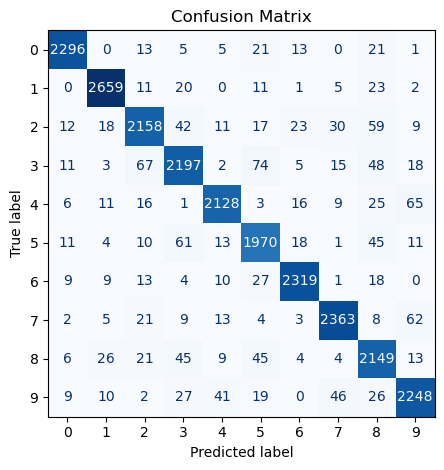

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(10)))
cm_disp.plot(cmap='Blues', values_format='d', colorbar=False)
plt.title("Confusion Matrix")
plt.grid(False)
plt.tight_layout()
plt.show()